In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [40]:
df = pd.read_csv('heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
nan_df = df.isna()
nan_df.sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
outliers = (df < lower_bound) | (df > upper_bound)
df_outliers = df.loc[outliers.any(axis=1)]
df_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


In [24]:
df = df[~outliers.any(axis=1)]
df

/var/folders/cn/k8ngtqqx5yl_k1ys7d07b22r0000gn/T/ipykernel_7360/1708238030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers.any(axis=1)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


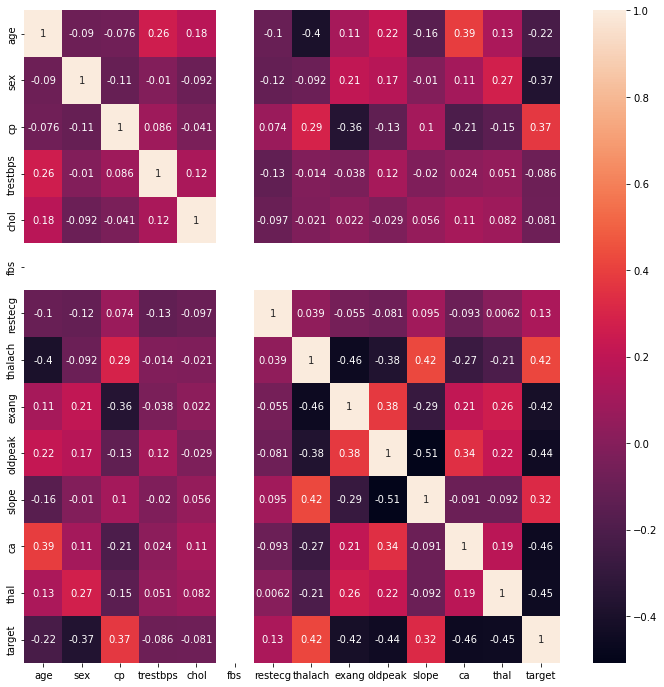

In [31]:
corrMatrix = df.corr()
plt.figure(figsize=(12, 12))
sn.heatmap(corrMatrix, annot=True)
plt.show()

/Users/lne/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


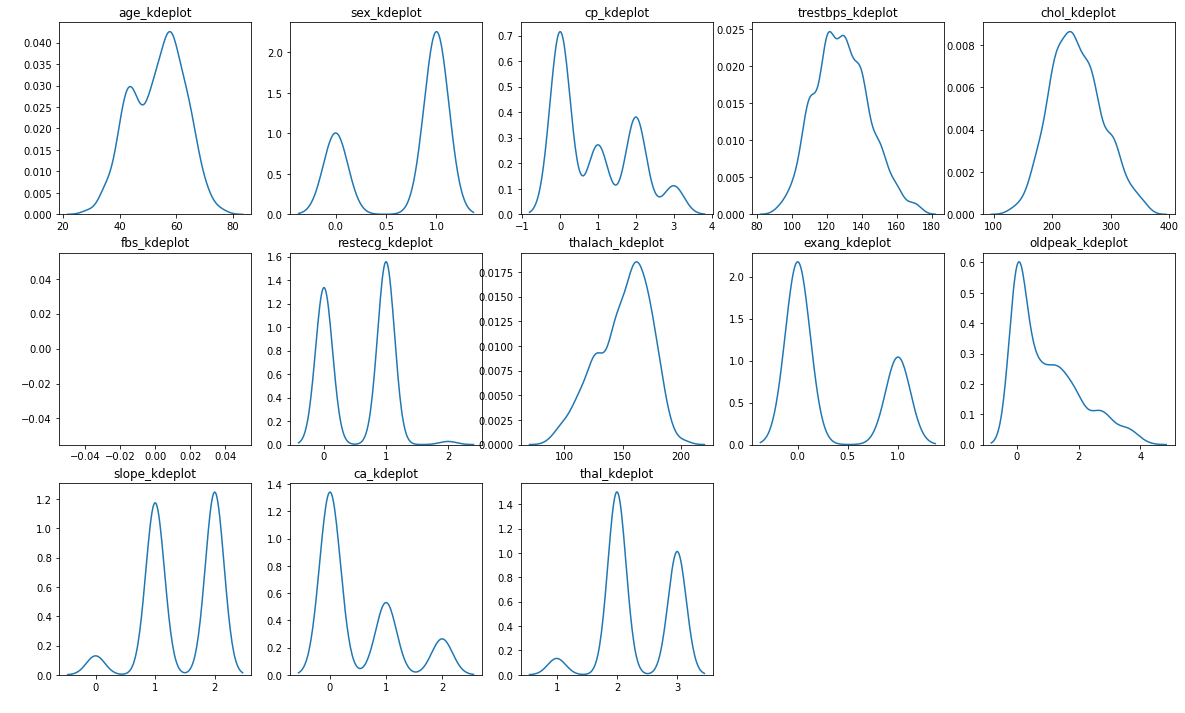

In [33]:
feature_list = df.columns.tolist()
feature_list.remove("target")

cols = 5
n=len(feature_list)
rows = int(np.ceil(n/cols))


plt.figure(figsize=(cols*4 , rows*4))

i=0
for val in feature_list:
    i += 1
    plt.subplot(rows, cols, i)
    sn.kdeplot(x=val,data=df)
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.title(val +"_kdeplot")   


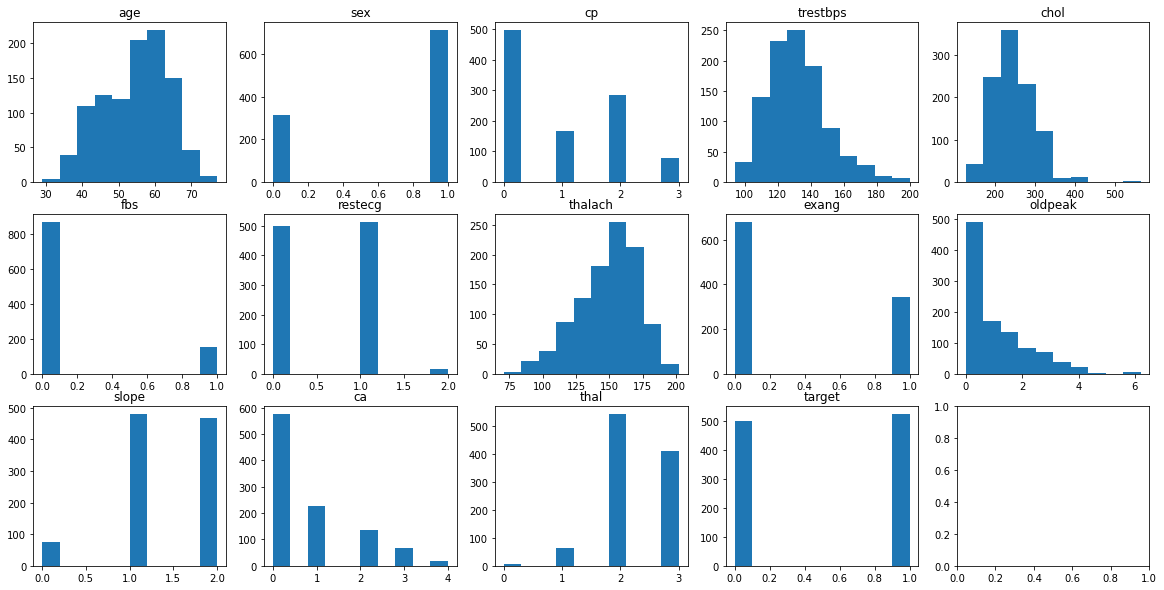

In [53]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))

# loop over each column in the dataframe and plot a histogram on the corresponding subplot
for i, column in enumerate(df.columns):
    row = i // 5
    col = i % 5
    axs[row, col].hist(df[column])
    axs[row, col].set_title(column)


In [48]:
range(1,13)

range(1, 13)